In [1]:
path_to_white_wine='../datasets/wine/winequality-white.csv'
path_to_red_wine='../datasets/wine/winequality-red.csv'
import sys
sys.path.append('../')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from implementations import random_forest, logistic_regression, linear_regression

## Exploratory data analysis Red Wine

In [2]:
red_wine=pd.read_csv(path_to_red_wine, sep=';')

### 1. Missing values

In [3]:
if red_wine.isnull().values.any():
    print('There are null values in the dataset!!!')
else:
    print('No null values in the dataset.')
missing_data = pd.DataFrame(red_wine.isnull().sum(),columns=['Missing Values'])
print(missing_data)

No null values in the dataset.
                      Missing Values
fixed acidity                      0
volatile acidity                   0
citric acid                        0
residual sugar                     0
chlorides                          0
free sulfur dioxide                0
total sulfur dioxide               0
density                            0
pH                                 0
sulphates                          0
alcohol                            0
quality                            0


### 2. Distribution of data

Text(0.5, 0.98, 'Plot distribution of data')

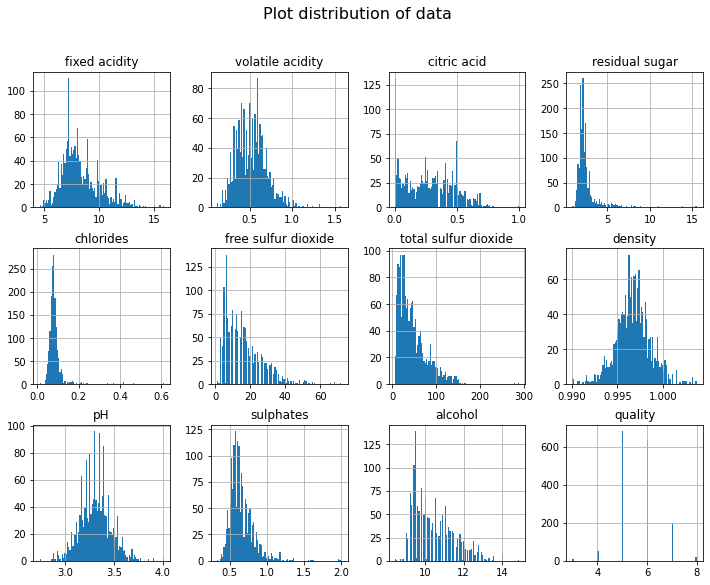

In [4]:
#check distribution of data
fig, axes = plt.subplots(len(red_wine.columns)//4, 4, figsize=(12, 9))
i = 0
for triaxis in axes:
    for axis in triaxis:
        red_wine.hist(column = red_wine.columns[i], bins = 100, ax=axis)
        i = i+1
fig.suptitle('Plot distribution of data', fontsize=16)

### 3. Outliers detection

Text(0.5, 0.98, 'Boxplots for observing outliers')

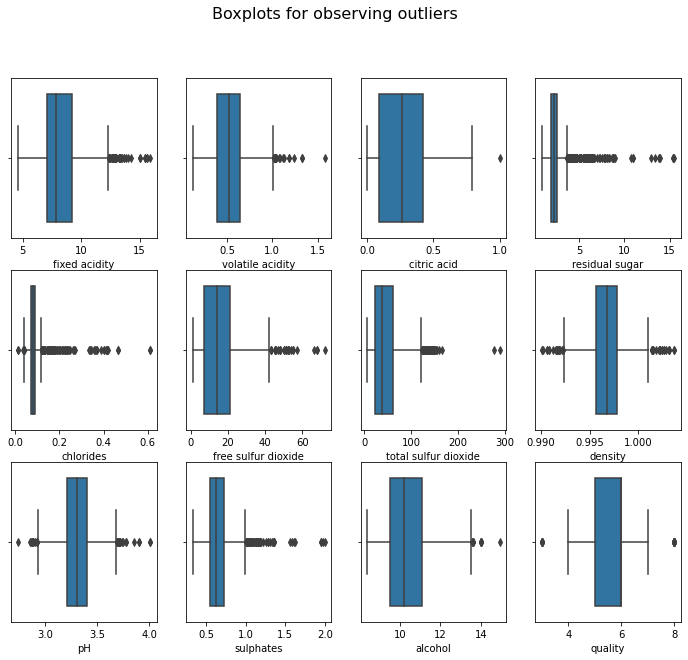

In [5]:
#plot boxplots for observing outliers
fig, axes = plt.subplots(len(red_wine.columns)//4, 4, figsize=(12, 10))
i = 0
for triaxis in axes:
    for axis in triaxis:
        sns.boxplot(x=red_wine[red_wine.columns[i]], ax=axis)
        i = i+1
fig.suptitle('Boxplots for observing outliers', fontsize=16)

### 4. Removing outliers

In [6]:
print('Removing outliers...')
#remove outliers
alfa=0.2
Q1 = red_wine.quantile(0.25)
Q3 = red_wine.quantile(0.75)
IQR = Q3 - Q1
red_wine = red_wine[~((red_wine < (Q1 - alfa * IQR)) |(red_wine > (Q3 + alfa * IQR))).any(axis=1)]

Removing outliers...


### 5. Verify outliers removal

Text(0.5, 0.98, 'Plot boxplots for checking absence of outliers')

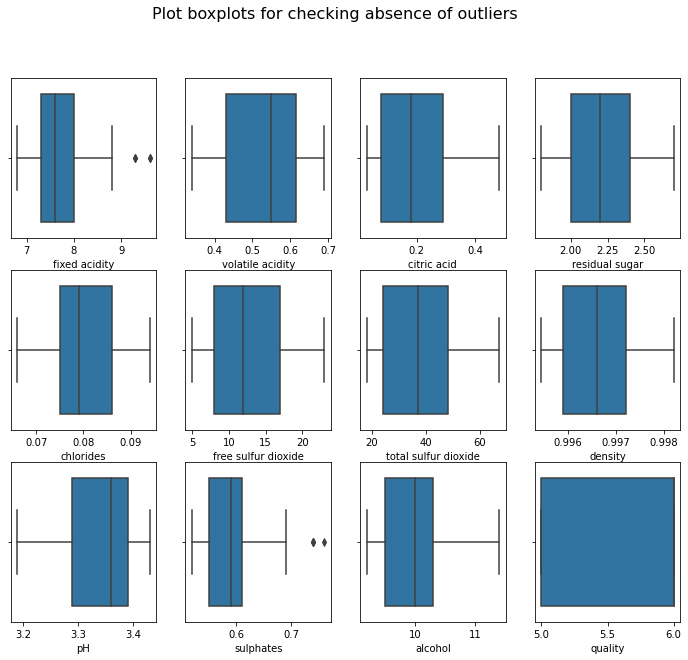

In [7]:
#plot boxplots for checking absence of outliers
fig, axes = plt.subplots(len(red_wine.columns)//4, 4, figsize=(12, 10))
i = 0
for triaxis in axes:
    for axis in triaxis:
        sns.boxplot(x=red_wine[red_wine.columns[i]], ax=axis)
        i = i+1
fig.suptitle('Plot boxplots for checking absence of outliers', fontsize=16)

### 6. Distribution of data after removing outliers

Text(0.5, 0.98, 'Distribution of data after removing outliers')

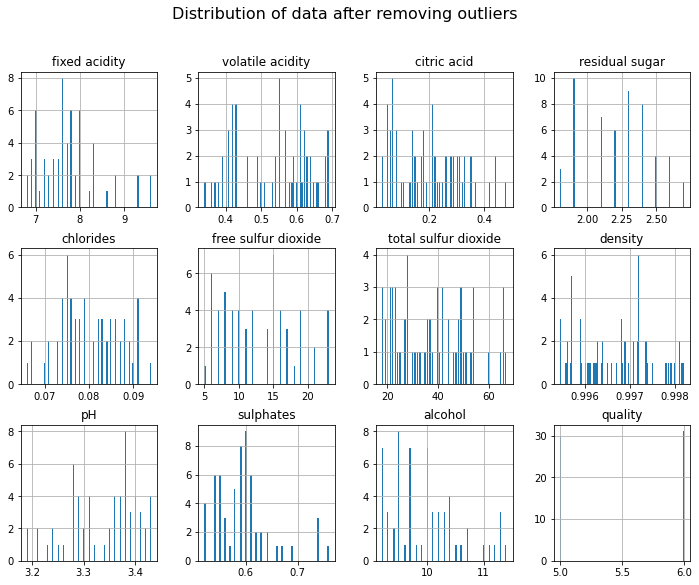

In [8]:
#check distribution of data
fig, axes = plt.subplots(len(red_wine.columns)//4, 4, figsize=(12, 9))
i = 0
for triaxis in axes:
    for axis in triaxis:
        red_wine.hist(column = red_wine.columns[i], bins = 100, ax=axis)
        i = i+1
fig.suptitle('Distribution of data after removing outliers', fontsize=16)

Since:
1. We observe that the distribution of the quality feature is drastically changed.
2. The values we removed in all features as outliers have the same order of magnitude of the other values
3. The values we removed in all features as outliers can be considered important values for characterising the respective distribution.

We suppose it is better to use the dataset as it is loaded without removing this "outliers".

## Exploratory data analysis White Wine

In [9]:
white_wine=pd.read_csv(path_to_white_wine, sep=';')

### 1. Missing values

In [10]:
if white_wine.isnull().values.any():
    print('There are null values in the dataset!!!')
else:
    print('No null values in the dataset.')
missing_data = pd.DataFrame(white_wine.isnull().sum(),columns=['Missing Values'])
print(missing_data)

No null values in the dataset.
                      Missing Values
fixed acidity                      0
volatile acidity                   0
citric acid                        0
residual sugar                     0
chlorides                          0
free sulfur dioxide                0
total sulfur dioxide               0
density                            0
pH                                 0
sulphates                          0
alcohol                            0
quality                            0


### 2. Distribution of data

Text(0.5, 0.98, 'Plot distribution of data')

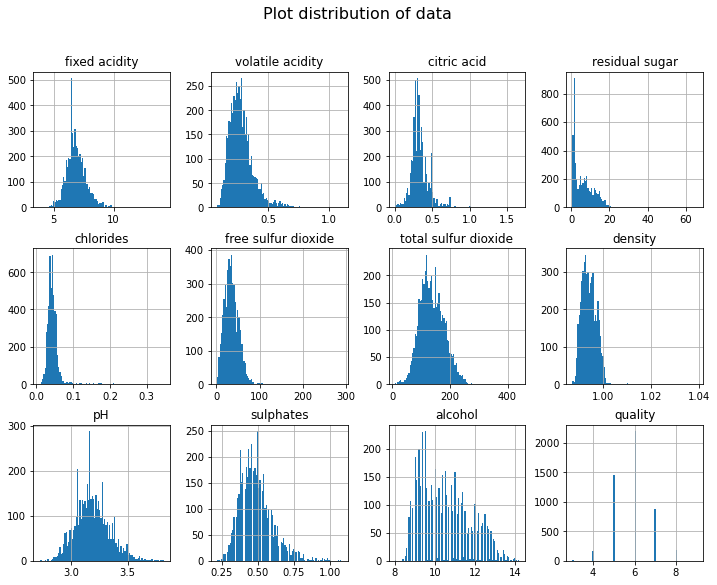

In [11]:
#check distribution of data
fig, axes = plt.subplots(len(white_wine.columns)//4, 4, figsize=(12, 9))
i = 0
for triaxis in axes:
    for axis in triaxis:
        white_wine.hist(column = white_wine.columns[i], bins = 100, ax=axis)
        i = i+1
fig.suptitle('Plot distribution of data', fontsize=16)

### 3. Outliers detection

Text(0.5, 0.98, 'Boxplots for observing outliers')

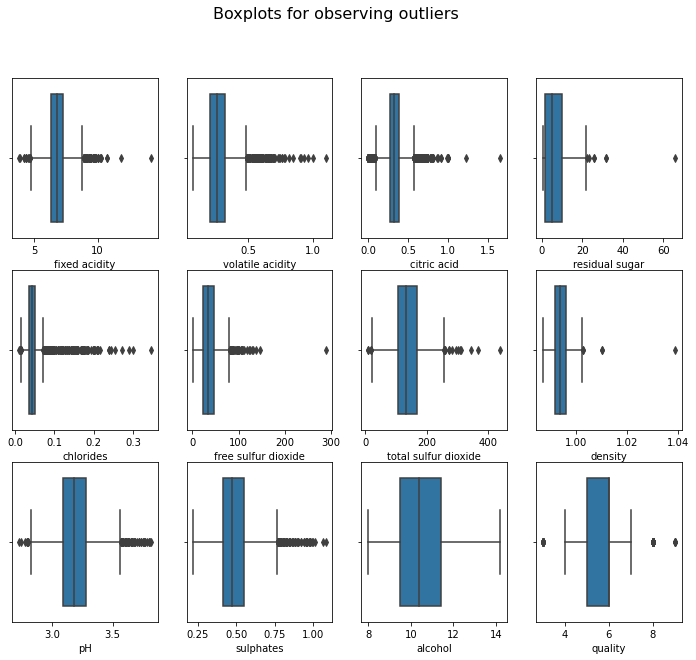

In [12]:
#plot boxplots for observing outliers
fig, axes = plt.subplots(len(white_wine.columns)//4, 4, figsize=(12, 10))
i = 0
for triaxis in axes:
    for axis in triaxis:
        sns.boxplot(x=white_wine[white_wine.columns[i]], ax=axis)
        i = i+1
fig.suptitle('Boxplots for observing outliers', fontsize=16)

### 4. Removing outliers

In [13]:
print('Removing outliers...')
#remove outliers
alfa=0.2
Q1 = white_wine.quantile(0.25)
Q3 = white_wine.quantile(0.75)
IQR = Q3 - Q1
white_wine = white_wine[~((white_wine < (Q1 - alfa * IQR)) |(white_wine > (Q3 + alfa * IQR))).any(axis=1)]

Removing outliers...


### 5. Verify outliers removal

Text(0.5, 0.98, 'Plot boxplots for checking absence of outliers')

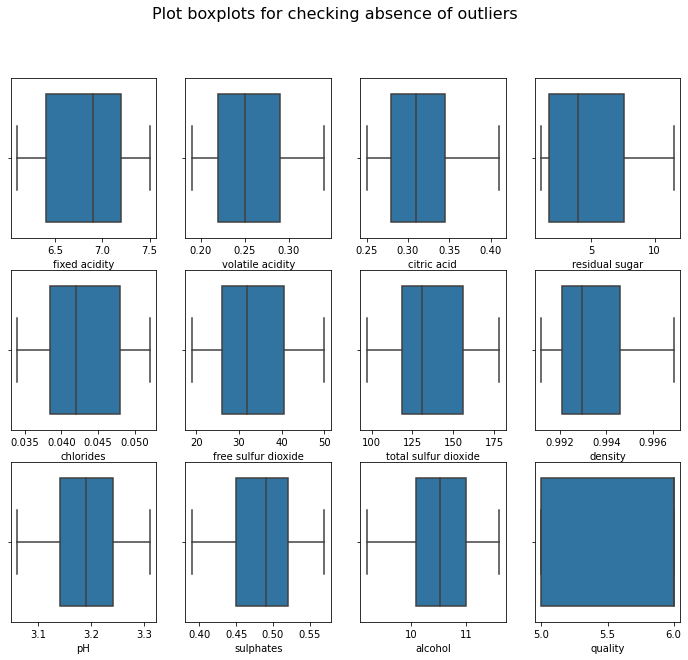

In [14]:
#plot boxplots for checking absence of outliers
fig, axes = plt.subplots(len(white_wine.columns)//4, 4, figsize=(12, 10))
i = 0
for triaxis in axes:
    for axis in triaxis:
        sns.boxplot(x=white_wine[white_wine.columns[i]], ax=axis)
        i = i+1
fig.suptitle('Plot boxplots for checking absence of outliers', fontsize=16)

### 6. Distribution of data after removing outliers

Text(0.5, 0.98, 'Distribution of data after removing outliers')

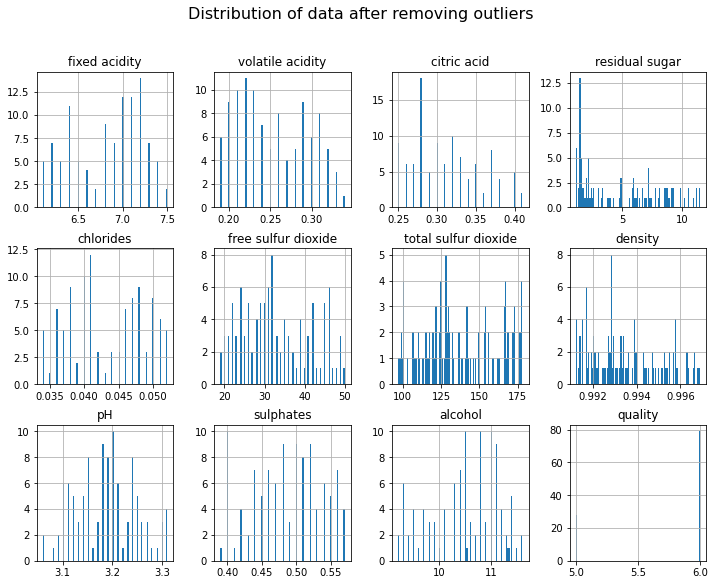

In [15]:
#check distribution of data
fig, axes = plt.subplots(len(white_wine.columns)//4, 4, figsize=(12, 9))
i = 0
for triaxis in axes:
    for axis in triaxis:
        white_wine.hist(column = white_wine.columns[i], bins = 100, ax=axis)
        i = i+1
fig.suptitle('Distribution of data after removing outliers', fontsize=16)

As we saw in the red_wine dataset:
1. We observe that the distribution of the quality feature is drastically changed.
2. The values we removed in all faetures as outliers have the same order of magnitude of the other values
3. The values we removed in all faetures as outliers can be considered important values for characterising the respective distribution. 

We suppose it is better to use the dataset as it is loaded without removing this "outliers".

## Apply all methods

In [16]:
def apply_all_methods(methods,data, frac):
    features=data.columns[:-1]
    label=data.columns[-1]
    #split data
    print(f'Split {round(frac*100,2)}% train, {round((1-frac)*100,2)}%')
    data_train=data.sample(frac=frac)
    data_test=data[~data.isin(data_train)].dropna()
    X_train=data_train[features].to_numpy()
    X_test=data_test[features].to_numpy()
    y_train=data_train[label].to_numpy()
    y_test=data_test[label].to_numpy()
    print(f'Shape train:{data_train.shape}. Ratio:{round(data_train.shape[0]/data.shape[0],2)}')
    print(f'Shape test:{data_test.shape}. Ratio:{round(data_test.shape[0]/data.shape[0],2)}')
    
    for method in methods:
        method(X_train,y_train,X_test,y_test)

## Apply methods to datasets

In [17]:
def apply_methods_to_datasets(datasets, methods, frac):
    for dataset in datasets:
        print(f'DATASET: {dataset["name"]}')
        apply_all_methods(methods, dataset["data"], frac)
        print("\n\n")

In [18]:
datasets=[{"name":"Red Wine", "data":red_wine}, {"name":"White Wine", "data":white_wine}]
apply_methods_to_datasets(datasets, [random_forest, logistic_regression, linear_regression], 0.7)

DATASET: Red Wine
Split 70.0% train, 30.0%
Shape train:(43, 12). Ratio:0.7
Shape test:(18, 12). Ratio:0.3


C:\Users\stefa\CS433-2021-ecoML\notebooks\..\base.py:90: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  row = df[df['name'].str.contains(cpu_name)]


CPU not found. Standard TDP=250 assigned.
----------------RANDOM FOREST---------------
accuracy: 0.5
########
Overall carbon footprint: 6.50e-04 gCO2eq
########
Carbon footprint due to computations: 6.50e-04 gCO2eq
Carbon footprint due to communications: 0.00e+00 gCO2eq
This carbon footprint is equivalent to 2.76e-08 trash bags of waste recycled instead of landfilled.


C:\Users\stefa\CS433-2021-ecoML\notebooks\..\base.py:90: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  row = df[df['name'].str.contains(cpu_name)]


CPU not found. Standard TDP=250 assigned.
----------------LOGISTIC REGRESSION---------------
accuracy: 0.33
########
Overall carbon footprint: 1.38e-04 gCO2eq
########
Carbon footprint due to computations: 1.38e-04 gCO2eq
Carbon footprint due to communications: 0.00e+00 gCO2eq
This carbon footprint is equivalent to 2.28e-09 incandescent lamps switched to leds.


C:\Users\stefa\CS433-2021-ecoML\notebooks\..\base.py:90: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  row = df[df['name'].str.contains(cpu_name)]


CPU not found. Standard TDP=250 assigned.
----------------LINEAR REGRESSION---------------
accuracy: 0.24
########
Overall carbon footprint: 8.12e-06 gCO2eq
########
Carbon footprint due to computations: 8.12e-06 gCO2eq
Carbon footprint due to communications: 0.00e+00 gCO2eq
This carbon footprint is equivalent to 2.30e-10 square meters of u.s. forests preserved from conversion to cropland in one year.



DATASET: White Wine
Split 70.0% train, 30.0%
Shape train:(75, 12). Ratio:0.7
Shape test:(32, 12). Ratio:0.3


C:\Users\stefa\CS433-2021-ecoML\notebooks\..\base.py:90: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  row = df[df['name'].str.contains(cpu_name)]


CPU not found. Standard TDP=250 assigned.
----------------RANDOM FOREST---------------
accuracy: 0.38
########
Overall carbon footprint: 8.13e-04 gCO2eq
########
Carbon footprint due to computations: 8.13e-04 gCO2eq
Carbon footprint due to communications: 0.00e+00 gCO2eq
This carbon footprint is equivalent to 1.76e-10 passenger vehicles driven for one year.


C:\Users\stefa\CS433-2021-ecoML\notebooks\..\base.py:90: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  row = df[df['name'].str.contains(cpu_name)]


CPU not found. Standard TDP=250 assigned.
----------------LOGISTIC REGRESSION---------------
accuracy: 0.31
########
Overall carbon footprint: 2.97e-04 gCO2eq
########
Carbon footprint due to computations: 2.97e-04 gCO2eq
Carbon footprint due to communications: 0.00e+00 gCO2eq
This carbon footprint is equivalent to 3.61e-05 smartphones charged.


C:\Users\stefa\CS433-2021-ecoML\notebooks\..\base.py:90: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  row = df[df['name'].str.contains(cpu_name)]


CPU not found. Standard TDP=250 assigned.
----------------LINEAR REGRESSION---------------
accuracy: 0.27
########
Overall carbon footprint: 0.00e+00 gCO2eq
########
Carbon footprint due to computations: 0.00e+00 gCO2eq
Carbon footprint due to communications: 0.00e+00 gCO2eq
This carbon footprint is equivalent to 0.00e+00 kilograms of coal burned.



